In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score

In [2]:
# dataframe program studi
prodi = pd.read_csv('/kaggle/input/indonesia-college-entrance-examination-utbk-2019/majors.csv')
prodi.drop('Unnamed: 0', axis=1, inplace=True)
prodi.sample(8)

,id_major,id_university,type,major_name,capacity
2474,3642092,364,humanities,DESAIN INTERIOR,41
2426,3622033,362,humanities,TEKNOLOGI PENDIDIKAN,28
2392,3562404,356,humanities,ILMU POLITIK,40
2090,3222454,322,humanities,BAHASA DAN SASTRA INGGRIS,64
314,1711187,171,science,PEND. KIMIA,40
2318,3532301,353,humanities,SASTRA ARAB,28
2971,7222075,722,humanities,PEND. BAH. JERMAN,16
2887,7112106,711,humanities,ILMU PEMERINTAHAN,40


In [3]:
# dataframe universitas
univ = pd.read_csv('/kaggle/input/indonesia-college-entrance-examination-utbk-2019/universities.csv')
univ.drop('Unnamed: 0', axis=1, inplace=True)
univ.head()

,id_university,university_name
0,111,UNIVERSITAS SYIAH KUALA
1,112,UNIVERSITAS MALIKUSSALEH
2,113,UNIVERSITAS TEUKU UMAR
3,114,UNIVERSITAS SAMUDRA
4,115,ISBI ACEH


In [4]:
# dataframe saintek
saintek = pd.read_csv('/kaggle/input/indonesia-college-entrance-examination-utbk-2019/score_science.csv')
saintek.drop(['Unnamed: 0','id_user'], axis=1, inplace=True)
saintek.sample(8)

,id_first_major,id_first_university,id_second_major,id_second_university,score_bio,score_fis,score_kim,score_kmb,score_kpu,score_kua,score_mat,score_ppu
38023,3741124,374,3611364,361,612,475,470,580,640,485,523,490
63132,3411025,341,3411393,341,443,492,710,541,492,542,586,546
36933,3321131,332,7111076,711,466,623,526,612,566,892,649,642
25645,3721093,372,3741074,374,468,538,515,503,442,366,626,502
8265,3831115,383,3831154,383,410,576,532,569,543,513,559,494
79217,3331125,333,3551035,355,455,524,518,417,564,357,577,732
40114,3731203,373,3711164,371,475,557,420,526,478,568,634,673
14137,3551333,355,3711083,371,336,490,487,525,529,554,369,486


In [5]:
# dataframe soshum
soshum = pd.read_csv('/kaggle/input/indonesia-college-entrance-examination-utbk-2019/score_humanities.csv')
soshum.drop(['Unnamed: 0','id_user'], axis=1, inplace=True)
soshum.sample(8)

,id_first_major,id_first_university,id_second_major,id_second_university,score_eko,score_geo,score_kmb,score_kpu,score_kua,score_mat,score_ppu,score_sej,score_sos
17080,3812095,381,3812087,381,667,491,598,691,477,521,577,643,598
55050,3632074,363,3512111,351,511,659,513,355,402,445,514,485,460
22047,3612031,361,1412075,141,669,657,509,541,597,501,641,649,395
55792,3212034,321,1512207,151,540,582,440,368,560,449,380,564,628
30004,3532065,353,3532026,353,650,606,625,702,761,567,574,676,490
3616,3812033,381,3552135,355,353,566,761,496,515,574,417,643,574
48619,1112192,111,1122051,112,526,557,502,468,513,543,402,627,440
35854,1412067,141,1412021,141,503,528,560,578,494,622,635,522,495


# Data Preparation

In [6]:
prodi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id_major       3167 non-null   int64 
 1   id_university  3167 non-null   int64 
 2   type           3167 non-null   object
 3   major_name     3167 non-null   object
 4   capacity       3167 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 123.8+ KB


In [7]:
univ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id_university    85 non-null     int64 
 1   university_name  85 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.5+ KB


In [8]:
saintek.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86570 entries, 0 to 86569
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   id_first_major        86570 non-null  int64
 1   id_first_university   86570 non-null  int64
 2   id_second_major       86570 non-null  int64
 3   id_second_university  86570 non-null  int64
 4   score_bio             86570 non-null  int64
 5   score_fis             86570 non-null  int64
 6   score_kim             86570 non-null  int64
 7   score_kmb             86570 non-null  int64
 8   score_kpu             86570 non-null  int64
 9   score_kua             86570 non-null  int64
 10  score_mat             86570 non-null  int64
 11  score_ppu             86570 non-null  int64
dtypes: int64(12)
memory usage: 7.9 MB


In [9]:
soshum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61202 entries, 0 to 61201
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   id_first_major        61202 non-null  int64
 1   id_first_university   61202 non-null  int64
 2   id_second_major       61202 non-null  int64
 3   id_second_university  61202 non-null  int64
 4   score_eko             61202 non-null  int64
 5   score_geo             61202 non-null  int64
 6   score_kmb             61202 non-null  int64
 7   score_kpu             61202 non-null  int64
 8   score_kua             61202 non-null  int64
 9   score_mat             61202 non-null  int64
 10  score_ppu             61202 non-null  int64
 11  score_sej             61202 non-null  int64
 12  score_sos             61202 non-null  int64
dtypes: int64(13)
memory usage: 6.1 MB


In [10]:
# Mencari id_university Universitas Indonesia
univ.loc[univ['university_name']=='UNIVERSITAS INDONESIA']

,id_university,university_name
23,321,UNIVERSITAS INDONESIA


Diketahui bahwa id_university untuk Universitas Indonesia adalah 321. Selanjutnya hanya diambil data dengan id_first_university atau id_second_university adalah 321.

In [11]:
# Memilih data dengan pilihan pertama atau pilihan kedua Universitas Indonesia
saintek_ui = saintek[(saintek['id_first_university']==321) | (saintek['id_second_university']==321)]
saintek_ui.head(8)

,id_first_major,id_first_university,id_second_major,id_second_university,score_bio,score_fis,score_kim,score_kmb,score_kpu,score_kua,score_mat,score_ppu
1,3211015,321,3611066,361,816,666,651,678,685,706,695,562
9,3211015,321,7111076,711,438,459,532,524,442,654,535,537
12,3211313,321,3211031,321,585,632,762,704,766,815,602,542
18,3211271,321,3221087,322,653,535,491,593,597,524,574,608
26,3211104,321,3551205,355,531,632,761,589,642,718,714,663
32,3211015,321,1711067,171,766,676,751,632,568,834,444,703
40,3211201,321,3211197,321,494,685,618,472,569,660,456,445
57,3211077,321,3211313,321,706,596,814,638,751,765,684,700


In [12]:
# Memilih data dengan pilihan pertama atau pilihan kedua Universitas Indonesia
soshum_ui = soshum[(soshum['id_first_university']==321) | (soshum['id_second_university']==321)]
soshum_ui.head(8)

,id_first_major,id_first_university,id_second_major,id_second_university,score_eko,score_geo,score_kmb,score_kpu,score_kua,score_mat,score_ppu,score_sej,score_sos
1,3212057,321,3322022,332,579,631,710,700,810,656,638,535,686
3,3212081,321,3212301,321,559,563,646,638,591,538,585,647,589
10,3212011,321,3332016,333,560,709,610,622,642,614,662,611,687
22,3322014,332,3212324,321,642,564,549,713,549,711,545,595,380
104,3212162,321,3242025,324,561,637,475,575,596,562,519,529,531
114,3212011,321,3212042,321,819,738,585,750,844,553,636,705,717
118,3212227,321,3212266,321,787,773,579,544,781,712,537,610,591
123,3212042,321,3212042,321,819,675,593,645,662,537,754,687,673


In [13]:
# Cek duplikasi data
saintek_ui.duplicated().sum()

0

In [14]:
# Cek duplikasi data
soshum_ui.duplicated().sum()

0

In [15]:
# Cek missing value
saintek_ui.isna().sum()

id_first_major          0
id_first_university     0
id_second_major         0
id_second_university    0
score_bio               0
score_fis               0
score_kim               0
score_kmb               0
score_kpu               0
score_kua               0
score_mat               0
score_ppu               0
dtype: int64

In [16]:
# Cek missing value
soshum_ui.isna().sum()

id_first_major          0
id_first_university     0
id_second_major         0
id_second_university    0
score_eko               0
score_geo               0
score_kmb               0
score_kpu               0
score_kua               0
score_mat               0
score_ppu               0
score_sej               0
score_sos               0
dtype: int64

# EDA

In [17]:
# Jumlah peserta yang mendaftar di UI pada pilihan 1 saja untuk program saintek
saintek_ui[(saintek_ui['id_first_university']==321) & (saintek_ui['id_second_university']!=321)].shape

(3150, 12)

In [18]:
# Jumlah peserta yang mendaftar di UI pada pilihan 2 saja untuk program saintek
saintek_ui[(saintek_ui['id_first_university']!=321) & (saintek_ui['id_second_university']==321)].shape

(1330, 12)

In [19]:
# Jumlah peserta yang mendaftar di UI pada pilihan 1 dan 2 untuk program saintek
saintek_ui[(saintek_ui['id_first_university']==321) & (saintek_ui['id_second_university']==321)].shape

(1260, 12)

Untuk program saintek, terdapat 3150 pendaftar yang memilih UI di pilihan 1 tetapi tidak memilih UI di pilihan 2. Sedangkan yang memilih UI hanya di pilihan 2 ada sebanyak 1330 pendaftar dan yang memilih UI di pilihan 1 dan 2 sebanyak 1260 pendaftar.

In [20]:
# Jumlah peserta yang mendaftar di UI pada pilihan 1 saja untuk program soshum
soshum_ui[(soshum_ui['id_first_university']==321) & (soshum_ui['id_second_university']!=321)].shape

(3009, 13)

In [21]:
# Jumlah peserta yang mendaftar di UI pada pilihan 2 saja untuk program soshum
soshum_ui[(soshum_ui['id_first_university']!=321) & (soshum_ui['id_second_university']==321)].shape

(767, 13)

In [22]:
# Jumlah peserta yang mendaftar di UI pada pilihan 1 dan 2 untuk program soshum
soshum_ui[(soshum_ui['id_first_university']==321) & (soshum_ui['id_second_university']==321)].shape

(1470, 13)

Untuk program soshum, terdapat 3009 pendaftar yang hanya memilih UI di pilihan 1. Sedangkan yang memilih UI hanya di pilihan 2 ada sebanyak 767 pendaftar dan yang memilih UI di pilihan 1 dan 2 sebanyak 1470 pendaftar.

Plot distribusi dari: score_bio


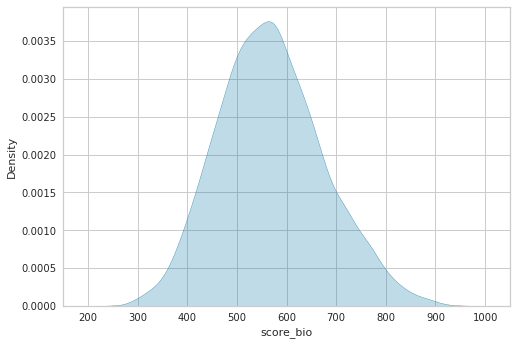

Plot distribusi dari: score_fis


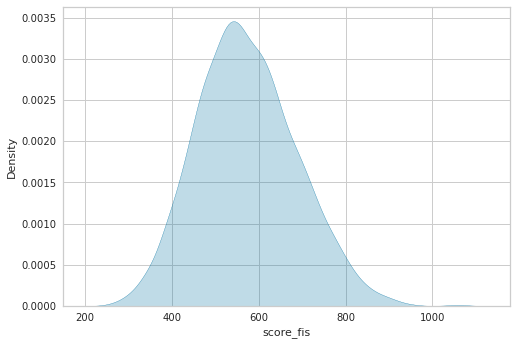

Plot distribusi dari: score_kim


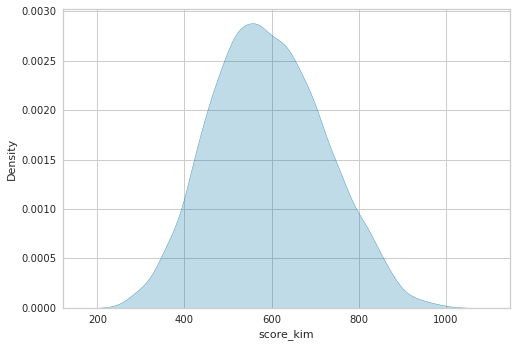

Plot distribusi dari: score_kmb


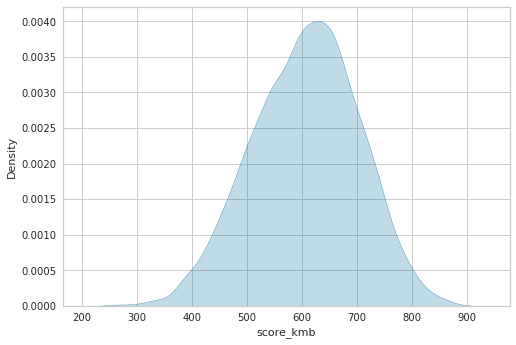

Plot distribusi dari: score_kpu


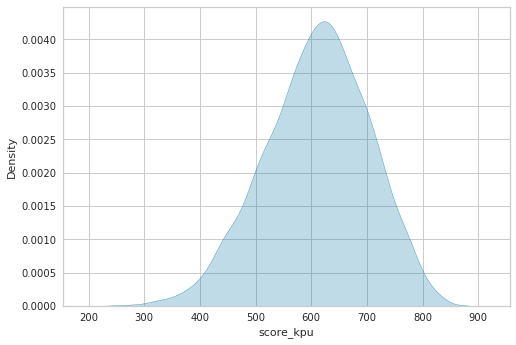

Plot distribusi dari: score_kua


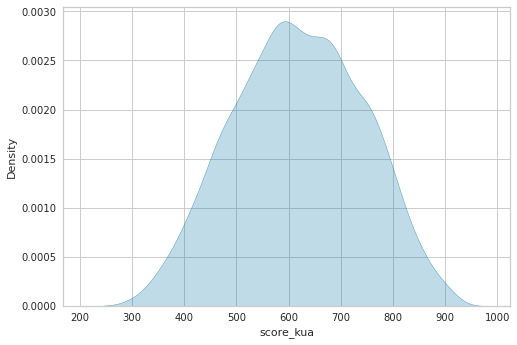

Plot distribusi dari: score_mat


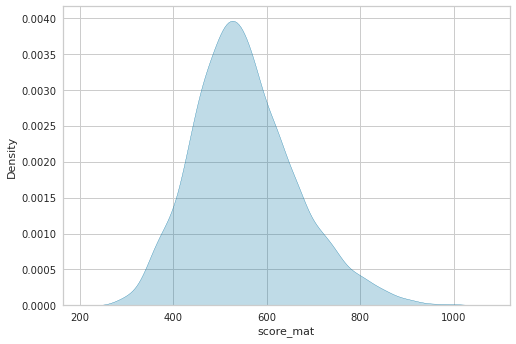

Plot distribusi dari: score_ppu


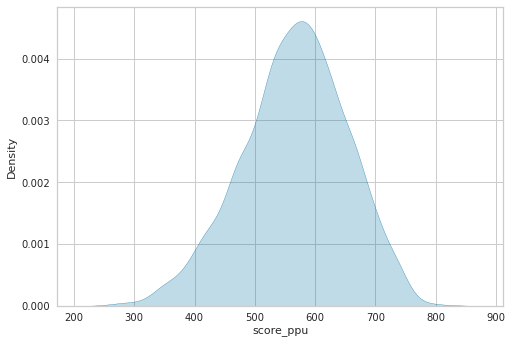

In [23]:
# Distribusi nilai peserta saintek yang mendaftar di UI
nilai_saintek_ui = saintek_ui.iloc[:,4:]

for i, var in enumerate(nilai_saintek_ui):
    print('Plot distribusi dari:', var)
    sns.kdeplot(saintek_ui[var], shade=True, color="b")
    plt.show()

Boxplot dari: score_bio


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


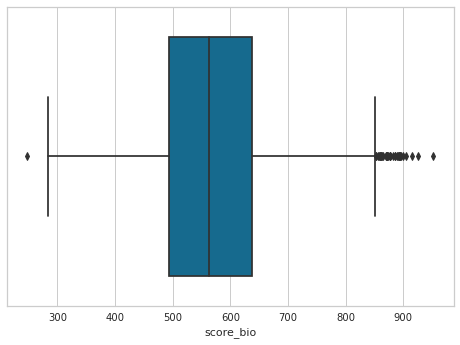

Boxplot dari: score_fis


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


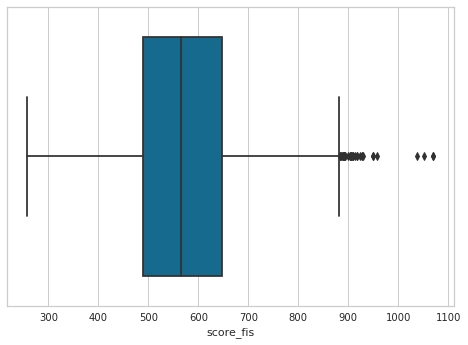

Boxplot dari: score_kim


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


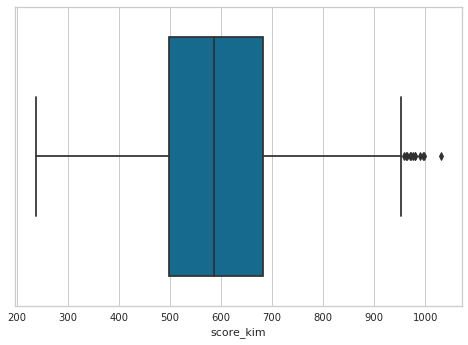

Boxplot dari: score_kmb


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


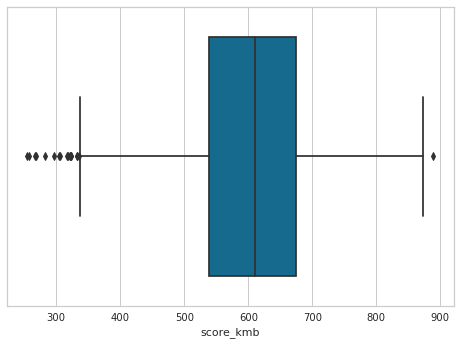

Boxplot dari: score_kpu


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


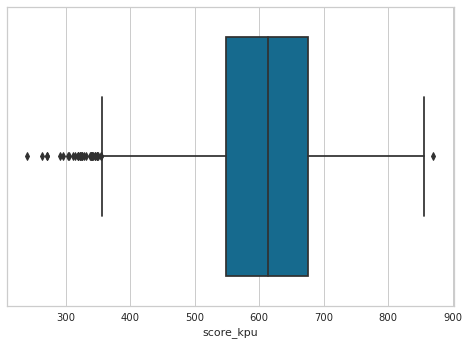

Boxplot dari: score_kua


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


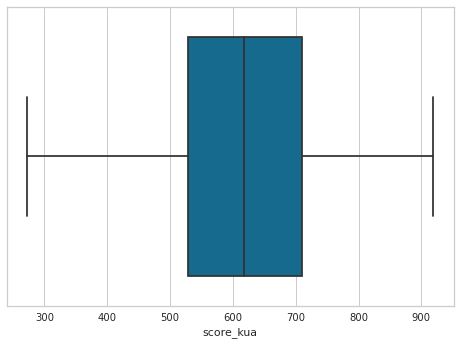

Boxplot dari: score_mat


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


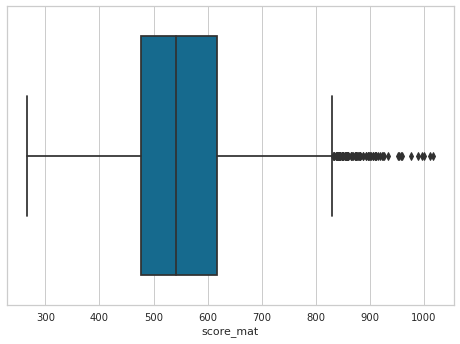

Boxplot dari: score_ppu


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


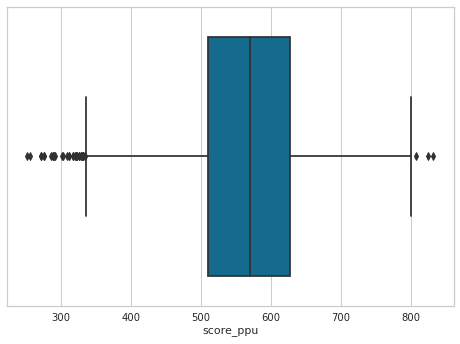

In [24]:
# Boxplot nilai peserta saintek yang mendaftar di UI
for i, var in enumerate(nilai_saintek_ui):
    print('Boxplot dari:', var)
    sns.boxplot(saintek_ui[var])
    plt.show()

In [25]:
nilai_saintek_ui.describe()

,score_bio,score_fis,score_kim,score_kmb,score_kpu,score_kua,score_mat,score_ppu
count,5740.000000,5740.000000,5740.000000,5740.000000,5740.000000,5740.000000,5740.000000,5740.00000
mean,568.371254,572.520035,592.286063,606.192509,609.623519,618.589895,552.205401,565.48223
std,106.557606,115.102039,129.257131,96.611572,93.980109,124.025838,110.673901,87.49972
min,248.000000,258.000000,237.000000,255.000000,241.000000,273.000000,267.000000,252.00000
25%,494.000000,490.000000,499.000000,539.000000,548.000000,529.000000,476.000000,510.00000
50%,563.000000,565.000000,586.000000,611.000000,614.000000,618.000000,541.000000,570.00000
75%,637.000000,647.000000,682.000000,674.000000,676.000000,710.000000,618.000000,627.00000
max,952.000000,1070.000000,1032.000000,889.000000,870.000000,919.000000,1017.000000,832.00000


Plot distribusi dari: score_eko


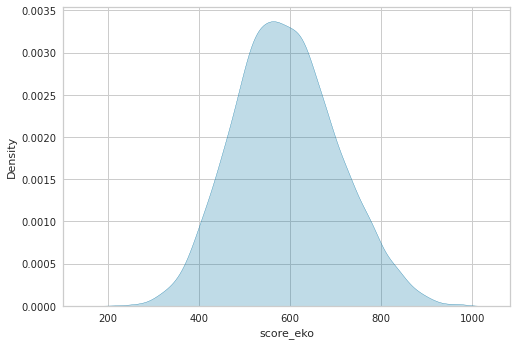

Plot distribusi dari: score_geo


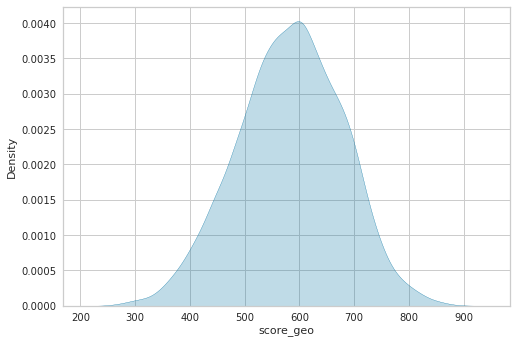

Plot distribusi dari: score_kmb


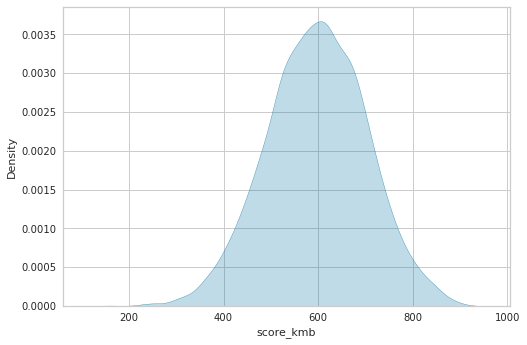

Plot distribusi dari: score_kpu


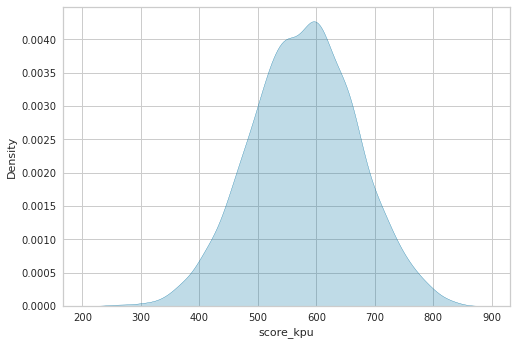

Plot distribusi dari: score_kua


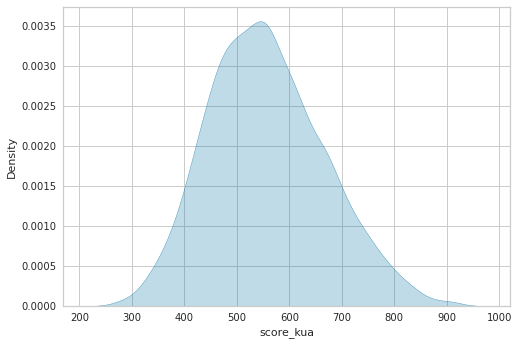

Plot distribusi dari: score_mat


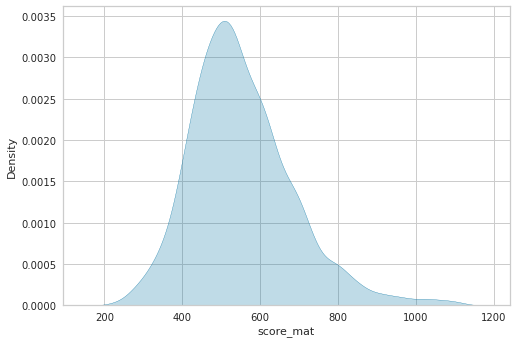

Plot distribusi dari: score_ppu


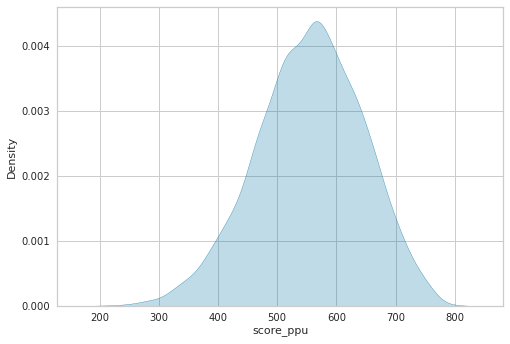

Plot distribusi dari: score_sej


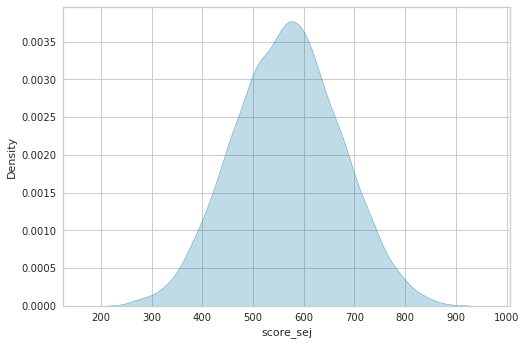

Plot distribusi dari: score_sos


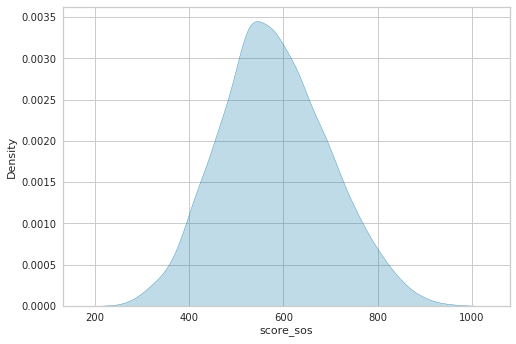

In [26]:
# Distribusi nilai peserta soshum yang mendaftar di UI
nilai_soshum_ui = soshum_ui.iloc[:,4:]

for i, var in enumerate(nilai_soshum_ui):
    print('Plot distribusi dari:', var)
    sns.kdeplot(soshum_ui[var], shade=True, color="b")
    plt.show()

Boxplot dari: score_eko


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


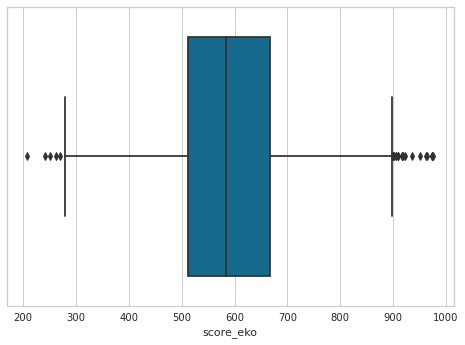

Boxplot dari: score_geo


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


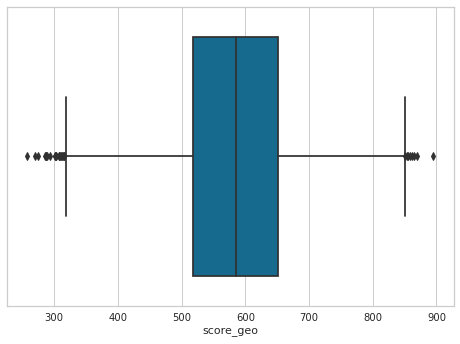

Boxplot dari: score_kmb


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


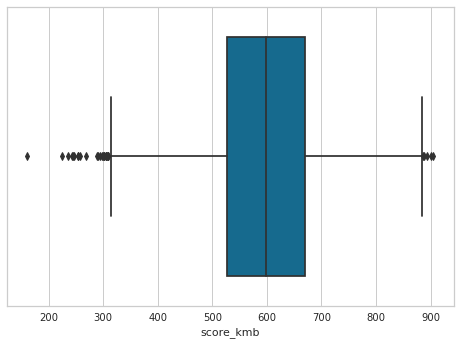

Boxplot dari: score_kpu


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


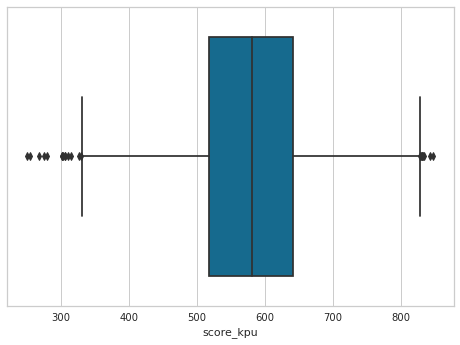

Boxplot dari: score_kua


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


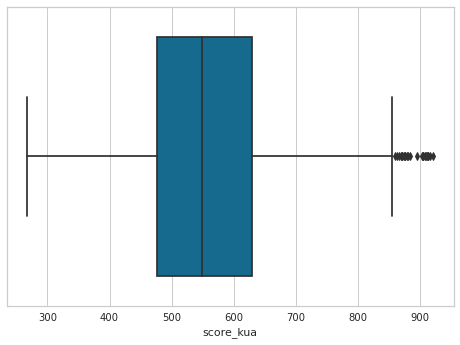

Boxplot dari: score_mat


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


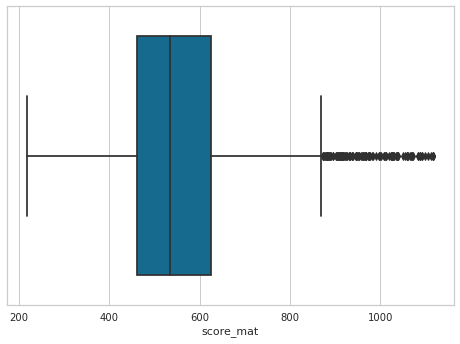

Boxplot dari: score_ppu


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


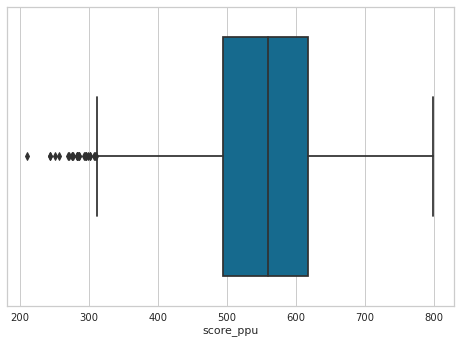

Boxplot dari: score_sej


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


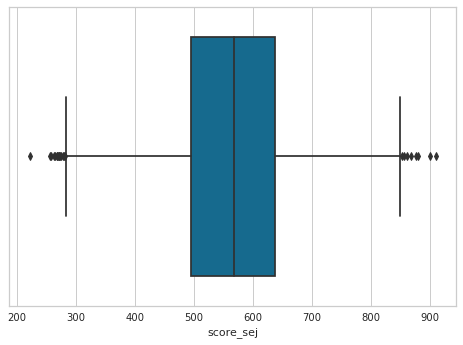

Boxplot dari: score_sos


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


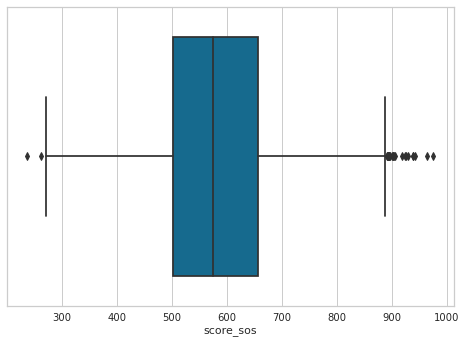

In [27]:
# Boxplot nilai peserta soshum yang mendaftar di UI
for i, var in enumerate(nilai_soshum_ui):
    print('Boxplot dari:', var)
    sns.boxplot(soshum_ui[var])
    plt.show()

In [28]:
nilai_soshum_ui.describe()

,score_eko,score_geo,score_kmb,score_kpu,score_kua,score_mat,score_ppu,score_sej,score_sos
count,5246.000000,5246.000000,5246.000000,5246.000000,5246.000000,5246.000000,5246.000000,5246.000000,5246.000000
mean,589.583111,582.470644,596.540030,578.442051,556.562905,552.519062,554.459588,566.934617,580.541937
std,113.406556,96.372139,105.241768,90.557757,110.746278,134.033923,90.200756,104.041807,115.520757
min,208.000000,258.000000,161.000000,251.000000,268.000000,219.000000,211.000000,222.000000,238.000000
25%,511.000000,518.000000,526.000000,517.000000,476.000000,461.000000,495.000000,496.000000,502.000000
50%,584.000000,586.000000,599.000000,581.000000,549.000000,534.000000,559.000000,568.000000,575.000000
75%,666.000000,651.000000,670.000000,641.000000,629.000000,625.000000,618.000000,638.000000,657.000000
max,976.000000,895.000000,905.000000,847.000000,921.000000,1117.000000,799.000000,910.000000,975.000000


In [29]:
# Uji t untuk melihat perbedaan rata-rata score_kmb saintek UI dan soshum UI
t, p = stats.ttest_ind(nilai_saintek_ui['score_kmb'].values,
                       nilai_soshum_ui['score_kmb'].values, 
                       equal_var=False)
print("t-value = " + str(t))
print("p-value = " + str(p))

t-value = 4.992921953204881
p-value = 6.041402785373946e-07


Karena p-value < 0.05, maka terdapat perbedaan antara rata-rata nilai KMB pada pendaftar UI program saintek dan soshum. Dilihat dari tabel statistik deskriptif kedua data, pendaftar saintek UI memiliki rata-rata nilai KMB lebih tinggi dari pendaftar soshum UI.

In [30]:
# Uji t untuk melihat perbedaan rata-rata score_kpu saintek UI dan soshum UI
t, p = stats.ttest_ind(nilai_saintek_ui['score_kpu'].values,
                       nilai_soshum_ui['score_kpu'].values, 
                       equal_var=False)
print("t-value = " + str(t))
print("p-value = " + str(p))

t-value = 17.70431085905789
p-value = 3.5568863384275905e-69


Karena p-value < 0.05, maka terdapat perbedaan antara rata-rata nilai KPU pada pendaftar UI program saintek dan soshum. Dilihat dari tabel statistik deskriptif kedua data, pendaftar saintek UI memiliki rata-rata nilai KPU lebih tinggi dari pendaftar soshum UI.

In [31]:
# Uji t untuk melihat perbedaan rata-rata score_ppu saintek UI dan soshum UI
t, p = stats.ttest_ind(nilai_saintek_ui['score_ppu'].values,
                       nilai_soshum_ui['score_ppu'].values, 
                       equal_var=False)
print("t-value = " + str(t))
print("p-value = " + str(p))

t-value = 6.489790278013644
p-value = 8.971245642860104e-11


Karena p-value < 0.05, maka terdapat perbedaan antara rata-rata nilai PPU pada pendaftar UI program saintek dan soshum. Dilihat dari tabel statistik deskriptif kedua data, pendaftar saintek UI memiliki rata-rata nilai PPU lebih tinggi dari pendaftar soshum UI.

In [32]:
# Uji t untuk melihat perbedaan rata-rata score_kua saintek UI dan soshum UI
t, p = stats.ttest_ind(nilai_saintek_ui['score_kua'].values,
                       nilai_soshum_ui['score_kua'].values, 
                       equal_var=False)
print("t-value = " + str(t))
print("p-value = " + str(p))

t-value = 27.690113124404938
p-value = 3.425346505296985e-163


Karena p-value < 0.05, maka terdapat perbedaan antara rata-rata nilai KUA pada pendaftar UI program saintek dan soshum. Dilihat dari tabel statistik deskriptif kedua data, pendaftar saintek UI memiliki rata-rata nilai KUA lebih tinggi dari pendaftar soshum UI.

# Clustering

## Scaling

In [33]:
scaler = MinMaxScaler()
scaler.fit(nilai_saintek_ui)  # Untuk nilai saintek UI
saintek_scaling = scaler.transform(nilai_saintek_ui)
saintek_scaling = pd.DataFrame(saintek_scaling, columns=nilai_saintek_ui.columns)
saintek_scaling.head()

,score_bio,score_fis,score_kim,score_kmb,score_kpu,score_kua,score_mat,score_ppu
0,0.806818,0.502463,0.520755,0.667192,0.705882,0.670279,0.570667,0.534483
1,0.269886,0.247537,0.371069,0.424290,0.319555,0.589783,0.357333,0.491379
2,0.478693,0.460591,0.660377,0.708202,0.834658,0.839009,0.446667,0.500000
3,0.575284,0.341133,0.319497,0.533123,0.565978,0.388545,0.409333,0.613793
4,0.401989,0.460591,0.659119,0.526814,0.637520,0.688854,0.596000,0.708621


In [34]:
scaler = MinMaxScaler()
scaler.fit(nilai_soshum_ui)  # Untuk nilai soshum UI
soshum_scaling = scaler.transform(nilai_soshum_ui)
soshum_scaling = pd.DataFrame(soshum_scaling, columns=nilai_soshum_ui.columns)
soshum_scaling.head()

,score_eko,score_geo,score_kmb,score_kpu,score_kua,score_mat,score_ppu,score_sej,score_sos
0,0.483073,0.585557,0.737903,0.753356,0.830015,0.486637,0.726190,0.454942,0.607870
1,0.457031,0.478807,0.651882,0.649329,0.494640,0.355234,0.636054,0.617733,0.476255
2,0.458333,0.708006,0.603495,0.622483,0.572741,0.439866,0.767007,0.565407,0.609227
3,0.565104,0.480377,0.521505,0.775168,0.430322,0.547884,0.568027,0.542151,0.192673
4,0.459635,0.594976,0.422043,0.543624,0.502297,0.381960,0.523810,0.446221,0.397558


## Mencari k optimal

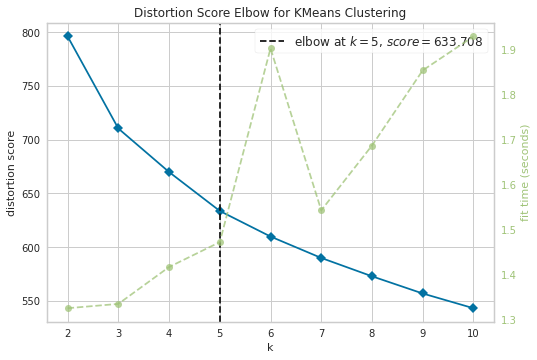

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
# Digunakan Elbow Method
Elbow_fast = KElbowVisualizer(KMeans(random_state=42))
Elbow_fast.fit(saintek_scaling)  # Data saintek
Elbow_fast.show()

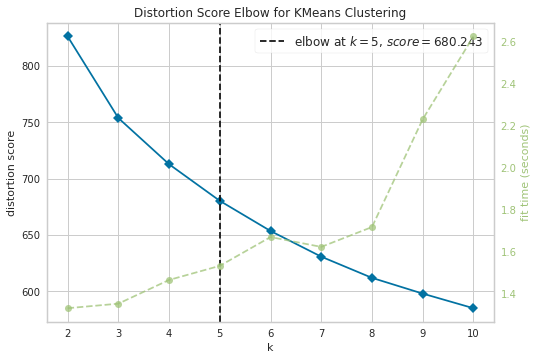

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
# Digunakan Elbow Method
Elbow_fast = KElbowVisualizer(KMeans(random_state=42))
Elbow_fast.fit(soshum_scaling)  # Data soshum
Elbow_fast.show()

Dari output Elbow Method di atas, baik program saintek maupun soshum sama-sama memiliki nilai k optimum sama dengan 5, tetapi kali ini akan diuji untuk nilai k = 4, 5, dan 6.

## KMeans ++

In [37]:
# Fit
saintek_4 = KMeans(n_clusters=4, init='k-means++', max_iter=10)
saintek_4.fit(saintek_scaling)  # Saintek

# Predict
pred_saintek_4 = saintek_4.predict(saintek_scaling)

saintek_ui['Cluster'] = pred_saintek_4

clus_saintek_4 = saintek_ui
clus_saintek_4.sample(5)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id_first_major,id_first_university,id_second_major,id_second_university,score_bio,score_fis,score_kim,score_kmb,score_kpu,score_kua,score_mat,score_ppu,Cluster
21592,3211015,321,3611066,361,775,723,832,678,733,524,595,625,2
67341,3211224,321,3211077,321,626,748,804,612,703,734,731,705,2
64790,3211135,321,3341112,334,591,521,618,566,697,612,451,609,3
68409,3211174,321,6111053,611,532,471,599,709,686,477,484,677,3
41027,3211232,321,3821287,382,668,588,634,725,644,687,545,611,2


In [38]:
# Fit
saintek_5 = KMeans(n_clusters=5, init='k-means++', max_iter=10)
saintek_5.fit(saintek_scaling)  # Saintek

# Predict
pred_saintek_5 = saintek_5.predict(saintek_scaling)

saintek_ui['Cluster'] = pred_saintek_5

clus_saintek_5 = saintek_ui
clus_saintek_5.sample(5)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id_first_major,id_first_university,id_second_major,id_second_university,score_bio,score_fis,score_kim,score_kmb,score_kpu,score_kua,score_mat,score_ppu,Cluster
26055,3211015,321,3551012,355,600,429,525,486,549,581,597,520,3
83227,3211127,321,3241092,324,575,481,494,549,498,580,660,649,1
4733,3211294,321,3211286,321,459,539,642,629,732,457,631,664,0
19391,3211174,321,3411273,341,513,484,648,873,706,712,536,604,2
79553,3211255,321,3721232,372,485,337,475,481,568,534,388,529,3


In [39]:
# Fit
saintek_6 = KMeans(n_clusters=6, init='k-means++', max_iter=10)
saintek_6.fit(saintek_scaling)  # Saintek

# Predict
pred_saintek_6 = saintek_6.predict(saintek_scaling)

saintek_ui['Cluster'] = pred_saintek_6

clus_saintek_6 = saintek_ui
clus_saintek_6.sample(5)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id_first_major,id_first_university,id_second_major,id_second_university,score_bio,score_fis,score_kim,score_kmb,score_kpu,score_kua,score_mat,score_ppu,Cluster
24082,3321073,332,3211166,321,546,561,666,482,530,695,466,478,2
73740,3211054,321,3211046,321,763,425,754,465,614,694,449,432,0
46767,3721085,372,3211255,321,489,526,838,578,536,647,804,582,0
62917,1711326,171,3211077,321,419,453,328,393,436,585,367,534,5
13444,3211305,321,3321034,332,454,577,696,769,651,535,492,507,0


In [40]:
# Fit
soshum_4 = KMeans(n_clusters=4, init='k-means++', max_iter=10)
soshum_4.fit(soshum_scaling)  # Soshum

# Predict
pred_soshum_4 = soshum_4.predict(soshum_scaling)

soshum_ui['Cluster'] = pred_soshum_4

clus_soshum_4 = soshum_ui
clus_soshum_4.sample(5)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id_first_major,id_first_university,id_second_major,id_second_university,score_eko,score_geo,score_kmb,score_kpu,score_kua,score_mat,score_ppu,score_sej,score_sos,Cluster
13920,3212297,321,3342204,334,512,645,725,513,619,493,760,662,523,0
30975,3212107,321,3332202,333,681,645,457,442,605,510,611,626,446,2
42739,3212073,321,3232305,323,686,715,591,613,561,287,464,442,685,2
19025,3212297,321,1912011,191,543,659,567,601,513,507,504,461,520,0
33682,3212154,321,3332047,333,541,703,602,639,565,500,619,514,663,2


In [41]:
# Fit
soshum_5 = KMeans(n_clusters=5, init='k-means++', max_iter=10)
soshum_5.fit(soshum_scaling)  # Soshum

# Predict
pred_soshum_5 = soshum_5.predict(soshum_scaling)

soshum_ui['Cluster'] = pred_soshum_5

clus_soshum_5 = soshum_ui
clus_soshum_5.sample(5)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id_first_major,id_first_university,id_second_major,id_second_university,score_eko,score_geo,score_kmb,score_kpu,score_kua,score_mat,score_ppu,score_sej,score_sos,Cluster
38200,3232174,323,3212154,321,424,419,381,458,459,543,456,414,445,1
29595,3212042,321,3232085,323,371,431,368,461,470,429,398,309,517,1
9931,3732133,373,3212274,321,474,407,539,434,584,459,544,676,458,1
20531,3212274,321,3332183,333,641,670,456,582,693,618,535,659,508,3
17360,3212251,321,6112184,611,509,595,570,548,576,592,533,730,555,2


In [42]:
# Fit
soshum_6 = KMeans(n_clusters=6, init='k-means++', max_iter=10)
soshum_6.fit(soshum_scaling)  # Soshum

# Predict
pred_soshum_6 = soshum_6.predict(soshum_scaling)

soshum_ui['Cluster'] = pred_soshum_6

clus_soshum_6 = soshum_ui
clus_soshum_6.sample(5)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id_first_major,id_first_university,id_second_major,id_second_university,score_eko,score_geo,score_kmb,score_kpu,score_kua,score_mat,score_ppu,score_sej,score_sos,Cluster
34581,3212011,321,3212096,321,687,510,759,619,639,504,625,484,693,4
35307,6112145,611,3212243,321,582,365,513,377,512,582,508,521,386,1
34927,3212316,321,3212204,321,531,561,551,408,455,573,364,473,493,1
41814,3212107,321,3722324,372,568,608,655,659,503,452,466,460,755,3
13917,3212251,321,3612046,361,565,515,580,509,563,495,723,417,563,2


Evaluasi Model

In [43]:
X = np.asarray(saintek_scaling)

# Digunakan silhouette score
sil_score = silhouette_score(X, saintek_4.labels_, metric='euclidean')
# Digunakan davies bouldin score
dav_score = davies_bouldin_score(X, saintek_4.labels_)

print('Silhouette Score dengan 4 klaster: %.3f' % sil_score)
print('Davies Bouldin Score dengan 4 klaster: %.3f' % dav_score)

Silhouette Score dengan 4 klaster: 0.143
Davies Bouldin Score dengan 4 klaster: 2.096


In [44]:
X = np.asarray(saintek_scaling)

# Digunakan silhouette score
sil_score = silhouette_score(X, saintek_5.labels_, metric='euclidean')
# Digunakan davies bouldin score
dav_score = davies_bouldin_score(X, saintek_5.labels_)

print('Silhouette Score dengan 4 klaster: %.3f' % sil_score)
print('Davies Bouldin Score dengan 4 klaster: %.3f' % dav_score)

Silhouette Score dengan 4 klaster: 0.122
Davies Bouldin Score dengan 4 klaster: 2.115


In [45]:
X = np.asarray(saintek_scaling)

# Digunakan silhouette score
sil_score = silhouette_score(X, saintek_6.labels_, metric='euclidean')
# Digunakan davies bouldin score
dav_score = davies_bouldin_score(X, saintek_6.labels_)

print('Silhouette Score dengan 4 klaster: %.3f' % sil_score)
print('Davies Bouldin Score dengan 4 klaster: %.3f' % dav_score)

Silhouette Score dengan 4 klaster: 0.111
Davies Bouldin Score dengan 4 klaster: 2.124


In [46]:
X = np.asarray(soshum_scaling)

# Digunakan silhouette score
sil_score = silhouette_score(X, soshum_4.labels_, metric='euclidean')
# Digunakan davies bouldin score
dav_score = davies_bouldin_score(X, soshum_4.labels_)

print('Silhouette Score dengan 4 klaster: %.3f' % sil_score)
print('Davies Bouldin Score dengan 4 klaster: %.3f' % dav_score)

Silhouette Score dengan 4 klaster: 0.117
Davies Bouldin Score dengan 4 klaster: 2.278


In [47]:
X = np.asarray(soshum_scaling)

# Digunakan silhouette score
sil_score = silhouette_score(X, soshum_5.labels_, metric='euclidean')
# Digunakan davies bouldin score
dav_score = davies_bouldin_score(X, soshum_5.labels_)

print('Silhouette Score dengan 4 klaster: %.3f' % sil_score)
print('Davies Bouldin Score dengan 4 klaster: %.3f' % dav_score)

Silhouette Score dengan 4 klaster: 0.109
Davies Bouldin Score dengan 4 klaster: 2.281


In [48]:
X = np.asarray(soshum_scaling)

# Digunakan silhouette score
sil_score = silhouette_score(X, soshum_6.labels_, metric='euclidean')
# Digunakan davies bouldin score
dav_score = davies_bouldin_score(X, soshum_6.labels_)

print('Silhouette Score dengan 4 klaster: %.3f' % sil_score)
print('Davies Bouldin Score dengan 4 klaster: %.3f' % dav_score)

Silhouette Score dengan 4 klaster: 0.098
Davies Bouldin Score dengan 4 klaster: 2.217


Dengan melihat Davies Bouldin Score terkecil, maka baik saintek maupun soshum, jumlah klaster yang optimal adalah 5 klaster.

<AxesSubplot:xlabel='Cluster', ylabel='count'>

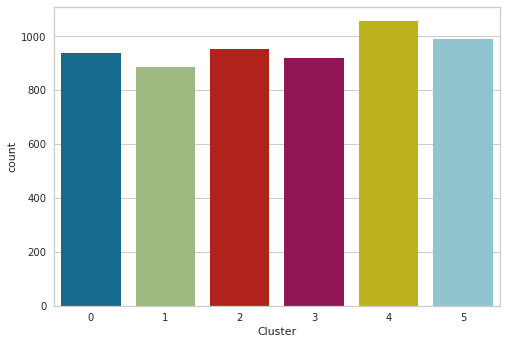

In [49]:
# Jumlah tiap klaster
sns.countplot(x=clus_saintek_5['Cluster'])

<AxesSubplot:xlabel='Cluster', ylabel='count'>

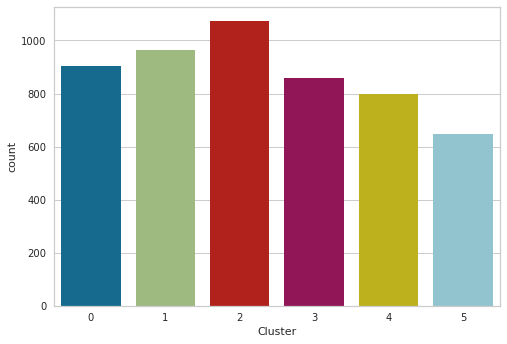

In [50]:
# Jumlah tiap klaster
sns.countplot(x=clus_soshum_5['Cluster'])

# Kesimpulan dan Saran
## Kesimpulan
* Pendaftar yang mendaftar UI di pilihan 1 dan 2 cenderung sedikit baik untuk program saintek maupun soshum
* Nilai semua mata uji skolastik untuk pendaftar UI program saintek lebih tinggi dari program soshum
* Nilai pendaftar UI baik program saintek maupun soshum untuk tiap mata uji cnderung berdistribusi normal dan memiliki sedikit outlier
* Banyaknya klaster optimal untuk tiap program adalah 5 klaster
* Jumlah anggota klaster untuk program saintek cenderung sama sedangkan soshum berbeda
## Saran
Dapat ditelusuri lebih lanjut untuk mengatahui karakteristik tiap klaster